In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Preparing data files

In [3]:
train_data = pd.read_csv('../input/spaceship-titanic/train.csv')
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
test_data = pd.read_csv('../input/spaceship-titanic/test.csv')
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


# Categorical Data Division

<span style="font-size:16px; font-family:verdana;">
    <strong>The list num_columns contains the classes with continuous data.  
        <br>The list cat_columns contains the classes with data divided into categories.</strong>
</span>

In [5]:
num_columns = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
cat_columns = ['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name']
target = 'Transported'

cat_unique = []
for cat in cat_columns:
    cat_unique.append(train_data[cat].nunique())
cat_unique = pd.Series(cat_unique, index = cat_columns)
cat_unique

PassengerId    8693
HomePlanet        3
CryoSleep         2
Cabin          6560
Destination       3
VIP               2
Name           8473
dtype: int64

In [6]:
train_data.groupby('Transported').describe().T

Transported                False          True
Age          count   4226.000000   4288.000000
             mean      29.922858     27.748834
             std       13.699262     15.151705
             min        0.000000      0.000000
             25%       21.000000     18.000000
             50%       27.000000     26.000000
             75%       38.000000     37.000000
             max       79.000000     78.000000
RoomService  count   4217.000000   4295.000000
             mean     389.266066     63.098021
             std      875.638123    274.812497
             min        0.000000      0.000000
             25%        0.000000      0.000000
             50%        1.000000      0.000000
             75%      473.000000      0.000000
             max    14327.000000   3992.000000
FoodCourt    count   4231.000000   4279.000000
             mean     382.615930    532.691984
             std     1200.115601   1931.306995
             min        0.000000      0.000000
             25%        0.000000      0.000000
             50%        0.000000      0.000000
             75%      179.000000      0.000000
             max    16856.000000  29813.000000
ShoppingMall count   4221.000000   4264.000000
             mean     167.566217    179.829972
             std      456.528126    722.026714
             min        0.000000      0.000000
             25%        0.000000      0.000000
             50%        0.000000      0.000000
             75%       95.000000      0.000000
             max    10705.000000  23492.000000
Spa          count   4223.000000   4287.000000
             mean     564.382666     61.675531
             std     1551.356047    262.682871
             min        0.000000      0.000000
             25%        0.000000      0.000000
             50%        4.000000      0.000000
             75%      453.500000      0.000000
             max    22408.000000   4103.000000
VRDeck       count   4225.000000   4280.000000
             mean     543.629822     69.148131
             std     1563.088368    291.658171
             min        0.000000      0.000000
             25%        0.000000      0.000000
             50%        1.000000      0.000000
             75%      388.000000      0.000000
             max    24133.000000   5063.000000

<span style="font-size:16px; font-family:verdana;">
    <strong>Correlation between different categorical columns</strong>
</span>

<AxesSubplot:>

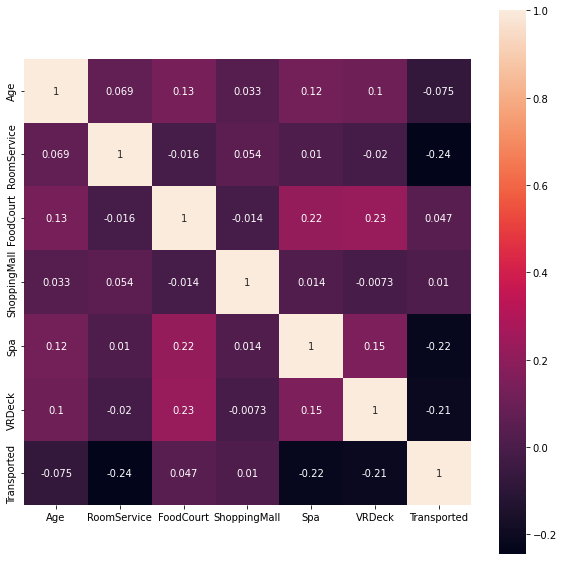

In [7]:
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(train_data.corr(), annot = True, square = True, ax = ax)

<span style="font-size:16px; font-family:verdana;">
    <strong>From the correlation matrix heatmap we can see that RoomService affects Transported the most, followed by Spa</strong>
</span>

# Missing values

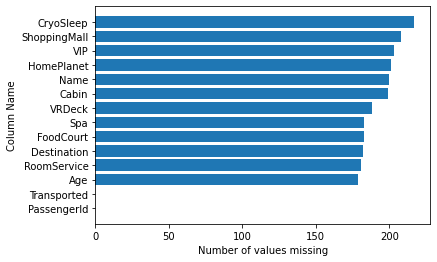

In [8]:
no_of_missing_values = train_data.isnull().sum().sort_values()

plt.ylabel("Column Name")
plt.xlabel("Number of values missing")
plt.barh(no_of_missing_values.index, no_of_missing_values.values)

plt.show()

<span style="font-size:16px; font-family:verdana;">
    <strong>
        Here I am filling the missing values in the numerical columns with their respective means, since this won't alter 
        the mean through the data set.
        The missing values in the categorical columns are filled with their respective mode.
    </strong>
</span>

In [9]:
def fill(df):
    for col in num_columns:
        df[col] = df[col].fillna(value = df[col].mean())

    for col in cat_columns:
        df[col] = df[col].fillna(value = df[col].mode()[0])
    return df

train_data = fill(train_data)
test_data = fill(test_data)
train_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.339054,659.739364,1594.434978,597.417440,1124.675871,1133.259049
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,78.000000,118.000000,45.000000,89.000000,71.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


# Plots of different Data categories and Transported

<span style="font-size:16px; font-family:verdana;">
<strong>Home planet vs Transported</strong></span>

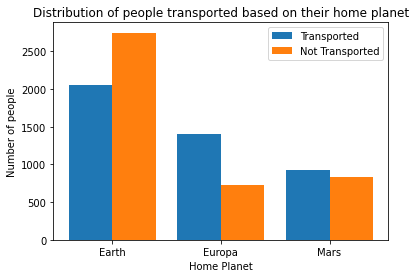

In [10]:
true_transported = train_data[train_data['Transported'] == True]
false_transported = train_data[train_data['Transported'] == False]

df_t = true_transported.groupby('HomePlanet')['PassengerId'].nunique()
df_f = false_transported.groupby('HomePlanet')['PassengerId'].nunique()

xpos = np.arange(len(df_t.index))

plt.xlabel("Home Planet")
plt.ylabel("Number of people")
plt.xticks(xpos, df_t.index)
plt.bar(xpos - 0.2, df_t.values, label = 'Transported', width = 0.4)
plt.bar(xpos + 0.2, df_f.values, label = 'Not Transported', width = 0.4)
plt.title("Distribution of people transported based on their home planet")
plt.legend()

plt.show()

<span style="font-size:16px; font-family:verdana;">
<strong>Destination vs Transported</strong></span>

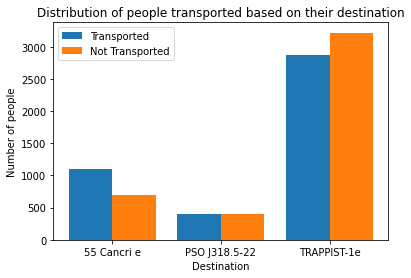

In [11]:
df_t = true_transported.groupby('Destination')['PassengerId'].nunique()
df_f = false_transported.groupby('Destination')['PassengerId'].nunique()

xpos = np.arange(len(df_t.index))

plt.xlabel("Destination")
plt.ylabel("Number of people")
plt.xticks(xpos, df_t.index)
plt.bar(xpos - 0.2, df_t.values, label = 'Transported', width = 0.4)
plt.bar(xpos + 0.2, df_f.values, label = 'Not Transported', width = 0.4)
plt.title("Distribution of people transported based on their destination")
plt.legend()

plt.show()

<span style="font-size:16px; font-family:verdana;">
<strong>CryoSleep vs Transported</strong>

Division of people who were transported on the basis of whether they were in cryo sleep or not</span>

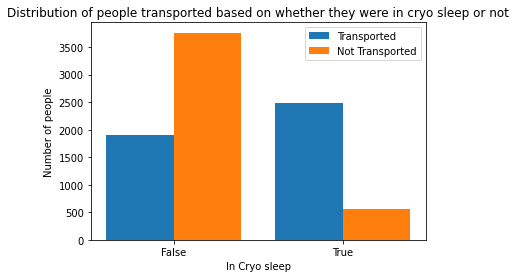

In [12]:
df_t = true_transported.groupby('CryoSleep')['PassengerId'].nunique()
df_f = false_transported.groupby('CryoSleep')['PassengerId'].nunique()

xpos = np.arange(len(df_t.index))

plt.xlabel("In Cryo sleep")
plt.ylabel("Number of people")
plt.xticks(xpos, df_t.index)
plt.bar(xpos - 0.2, df_t.values, label = 'Transported', width = 0.4)
plt.bar(xpos + 0.2, df_f.values, label = 'Not Transported', width = 0.4)
plt.title("Distribution of people transported based on whether they were in cryo sleep or not")
plt.legend()

plt.show()

<span style="font-size:16px; font-family:verdana;">
    <strong>Age vs Transported</strong><br>
</span>

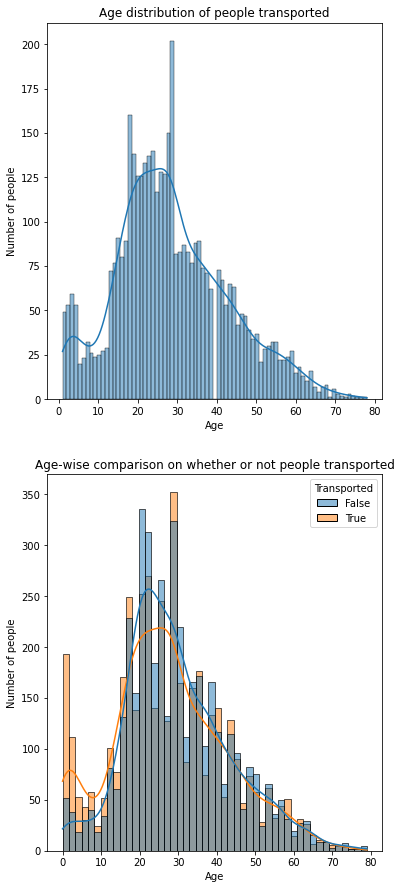

In [13]:
df = true_transported[true_transported['Age'] > 0]['Age']

fig, plots = plt.subplots(2, 1)

plot1 = sns.histplot(kde = True,bins = int(true_transported['Age'].max()) + 1, data = df, ax = plots[0])
plot1.set(xlabel = 'Age', ylabel = 'Number of people', title = 'Age distribution of people transported')

plot2 = sns.histplot(x = 'Age', data = train_data, hue = 'Transported', kde = True, ax = plots[1])
plot2.set(xlabel = 'Age', ylabel = 'Number of people', title = 'Age-wise comparison on whether or not people transported')

plt.subplots_adjust(top = 3.0)
plt.show()

<span style="font-size:16px; font-family:verdana;">
    <strong>VIP vs Transported</strong>
    <br>This chart shows that only 1.74% of the people transported were VIPs
</span>

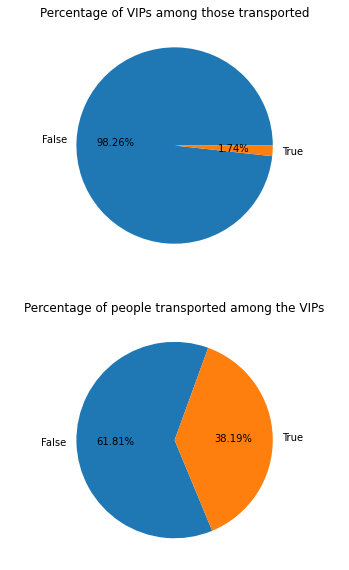

In [14]:
fig, (ax1,ax2) = plt.subplots(2, 1)

df = true_transported.groupby('VIP')['PassengerId'].nunique()
ax1.axis("equal")
ax1.pie(df.values, labels=df.index, radius=1.0, autopct='%0.2f%%')
ax1.set_title('Percentage of VIPs among those transported')

df = train_data[train_data['VIP'] == True].groupby('Transported')['PassengerId'].nunique()
ax2.axis("equal")
ax2.pie(df.values, labels=df.index, radius=1.0, autopct='%0.2f%%', startangle = 70)
ax2.set_title('Percentage of people transported among the VIPs')

plt.subplots_adjust(top = 2.0)
plt.show()

<span style="font-size:16px; font-family:verdana;">
    <strong>Cabin vs Transported</strong>
</span>

In [15]:
def cabin_separation(df):
    k = df['Cabin'].str.split('/', expand = True)
    df['CabinDeck'] = k[0]
    df['CabinNum']  = k[1].astype(int)
    df['CabinSide'] = k[2]
    df.drop(columns = ['Cabin'], inplace = True)
    
    return df

train_data = cabin_separation(train_data)
test_data = cabin_separation(test_data)

t_transported = train_data[train_data['Transported'] == True].dropna()
f_transported = train_data[train_data['Transported'] == False].dropna()
df_1 = t_transported.groupby('CabinDeck')['PassengerId'].nunique()
df_2 = f_transported.groupby('CabinDeck')['PassengerId'].nunique()
df_3 = t_transported.groupby('CabinSide')['PassengerId'].nunique()
df_4 = f_transported.groupby('CabinSide')['PassengerId'].nunique()

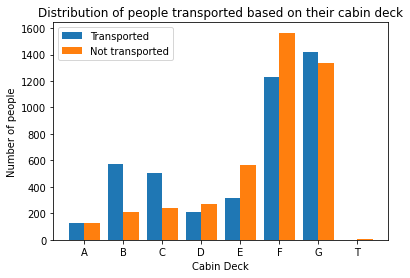

In [16]:
xpos = np.arange(len(df_1.index))

plt.xlabel("Cabin Deck")
plt.ylabel("Number of people")
plt.xticks(xpos, df_1.index)
plt.bar(xpos - 0.2, df_1.values, label = 'Transported', width = 0.4)
plt.bar(xpos + 0.2, df_2.values, label = 'Not transported', width = 0.4)
plt.title("Distribution of people transported based on their cabin deck")
plt.legend()

plt.show()

[Text(0.5, 0, 'Cabin Number'), Text(0, 0.5, 'Number of people')]

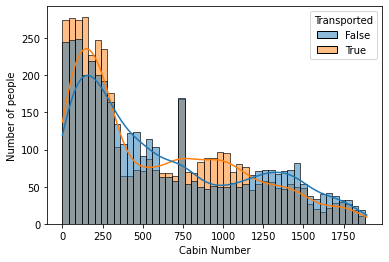

In [17]:
cnum_max = train_data.max()['CabinNum']
plot = sns.histplot(x = 'CabinNum', data = train_data, hue = 'Transported', kde = True, bins = np.arange(0, cnum_max, 40))
plot.set(xlabel = 'Cabin Number', ylabel = 'Number of people')

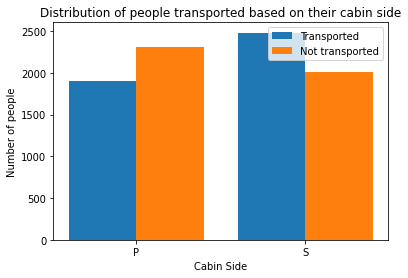

In [18]:
xpos = np.arange(len(df_3.index))

plt.xlabel("Cabin Side")
plt.ylabel("Number of people")
plt.xticks(xpos, df_3.index)
plt.bar(xpos - 0.2, df_3.values, label = 'Transported', width = 0.4)
plt.bar(xpos + 0.2, df_4.values, label = 'Not transported', width = 0.4)
plt.title("Distribution of people transported based on their cabin side")
plt.legend()

plt.show()

<span style="font-size:16px; font-family:verdana;">
<strong>Finding Total Bill and average cost deck-wise

In [19]:
def total_bill(df):
    df['Total'] = df['RoomService'] + df['FoodCourt'] + df['ShoppingMall'] + df['Spa'] + df['VRDeck']
    return df

train_data = total_bill(train_data)
test_data = total_bill(test_data)

deck_wise = train_data.groupby('CabinDeck').aggregate({'Total': 'sum', 'Transported': 'sum', 'CryoSleep': 'sum', 'PassengerId': 'size'}).reset_index()
deck_wise['Avg'] = deck_wise['Total'] / deck_wise['PassengerId']
deck_wise['TransportPercent'] = deck_wise['Transported'] / deck_wise['PassengerId']
deck_wise['CryoPercent'] = deck_wise['CryoSleep'] / deck_wise['PassengerId']
deck_wise = deck_wise.sort_values('Avg', ascending = False)
deck_wise

,CabinDeck,Total,Transported,CryoSleep,PassengerId,Avg,TransportPercent,CryoPercent
7,T,2.375573e+04,1,0,5,4751.145834,0.200000,0.000000
2,C,3.092499e+06,508,294,747,4139.891481,0.680054,0.393574
0,A,8.757700e+05,127,68,256,3420.976448,0.496094,0.265625
1,B,2.302080e+06,572,419,779,2955.173482,0.734275,0.537869
3,D,1.110432e+06,207,104,478,2323.079280,0.433054,0.217573
4,E,1.160561e+06,313,168,876,1324.841584,0.357306,0.191781
5,F,2.840079e+06,1229,550,2794,1016.492233,0.439871,0.196850
6,G,1.395157e+06,1421,1434,2758,505.858285,0.515228,0.519942


In [20]:
train_data = train_data.merge(deck_wise[['CabinDeck', 'TransportPercent', 'Avg']], how = 'left', on = ['CabinDeck'])
test_data = test_data.merge(deck_wise[['CabinDeck', 'TransportPercent', 'Avg']], how = 'left', on = ['CabinDeck'])

Text(0.5, 1.0, 'Average Total Expenditure')

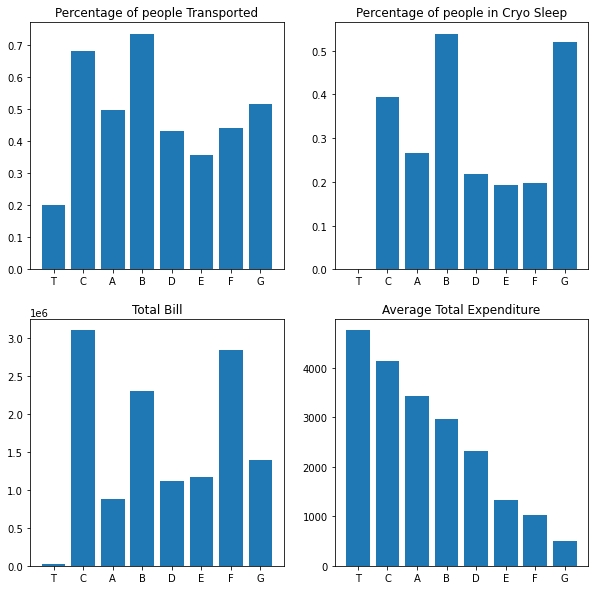

In [21]:
fig, ax = plt.subplots(2, 2, figsize = (10, 10))

ax[0, 0].bar(deck_wise['CabinDeck'], deck_wise['TransportPercent'])
ax[0, 0].set_title("Percentage of people Transported")

ax[0, 1].bar(deck_wise['CabinDeck'], deck_wise['CryoPercent'])
ax[0, 1].set_title("Percentage of people in Cryo Sleep")

ax[1, 0].bar(deck_wise['CabinDeck'], deck_wise['Total'])
ax[1, 0].set_title("Total Bill")

ax[1, 1].bar(deck_wise['CabinDeck'], deck_wise['Avg'])
ax[1, 1].set_title("Average Total Expenditure")

<span style="font-size:16px; font-family:verdana;">
<strong>Passenger Id vs Transported

In [22]:
def passid_separation(df):
    k = df['PassengerId'].str.split('_', expand = True)
    df['Group'] = k[0].astype(int)
    df['GroupNo']  = k[1].astype(int)
    
    return df

train_data = passid_separation(train_data)
test_data = passid_separation(test_data)

t_transported = train_data[train_data['Transported'] == True].dropna()
f_transported = train_data[train_data['Transported'] == False].dropna()
df_1 = t_transported.groupby('Group')['PassengerId'].nunique()
df_2 = f_transported.groupby('Group')['PassengerId'].nunique()
df_3 = t_transported.groupby('GroupNo')['PassengerId'].nunique()
df_4 = f_transported.groupby('GroupNo')['PassengerId'].nunique()

[Text(0.5, 0, 'Group'), Text(0, 0.5, 'Number of people')]

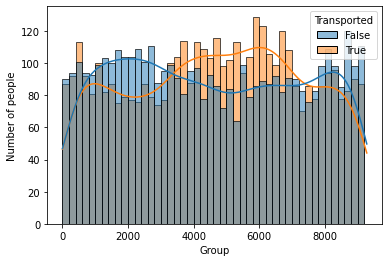

In [23]:
group_max = train_data.max()['Group']
plot = sns.histplot(x = 'Group', data = train_data, hue = 'Transported', kde = True, bins = np.arange(0, group_max, 200))
plot.set(xlabel = 'Group', ylabel = 'Number of people')

[Text(0.5, 0, 'Group Number'), Text(0, 0.5, 'Number of people')]

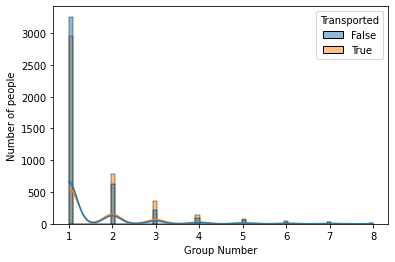

In [24]:
group_max = train_data.max()['GroupNo']
plot = sns.histplot(x = 'GroupNo', data = train_data, hue = 'Transported', kde = True)
plot.set(xlabel = 'Group Number', ylabel = 'Number of people')

# **LightGBM Model**

# Importing necessary libraries

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import lightgbm as lgb

sc = StandardScaler()

# Data Preprocessing

In [26]:
cols = ['HomePlanet', 'CryoSleep', 'CabinDeck', 'CabinSide', 'Destination', 'VIP']

def encode(df):
    for col in cols:
        df[col] = df[col].astype(str)
        df[col] = LabelEncoder().fit_transform(df[col])
    return df

train_data = encode(train_data)
test_data = encode(test_data)

In [27]:
features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP','CabinDeck', 'CabinNum', 'CabinSide', 'Group', 'Total', 'Avg'] + num_columns
features_train = train_data[features]
features_test = test_data[features]
features_train = sc.fit_transform(features_train)
features_test = sc.fit_transform(features_test)

params = {}
params['learning_rate'] = 0.08
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 10

y_train = train_data['Transported']
data = lgb.Dataset(features_train, label = y_train)

model = lgb.train(params, data, train_data.count()[0])

[LightGBM] [Info] Number of positive: 4378, number of negative: 4315
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001171 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2156
[LightGBM] [Info] Number of data points in the train set: 8693, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503624 -> initscore=0.014495
[LightGBM] [Info] Start training from score 0.014495


# Finding the predictions of the model

In [28]:
output = model.predict(features_test)
output = output > 0.5

# Creating the submission file

In [29]:
sub = pd.read_csv('../input/spaceship-titanic/sample_submission.csv')
sub['Transported'] = output
sub.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [30]:
sub.to_csv('submission.csv', index = False)